In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("df_data/df_temp_cluster_Own_Loan_Amount_Condition.csv")

In [3]:
df.head()

,Id,AccountID,Number_Of_Loans_Granted__c,Num_Of_Loans_Paid__c,Purpose_of_Loan__c,Total_Repayments__c,Amount,Term_in_Weeks__c,Payment_Frequency__c,StageName,Applicant Age,summary_income,summary_income_cv,city,state,Country,userId,loanId,count,Cluster_result
0,0062x000002aHhMAAU,0010K00001cOB9dQAG,4,3,Elec / Gas / Water,6,150,6.571,Weekly,Loan Paid,25,1300.00,2563.49,Mount Crosby,QLD,Australia,432,82379,1,1
1,0062x00000AlkKWAAZ,0010K00001cPxiTQAS,3,3,Other,3,100,6.143,Fortnightly,Loan Paid,39,2708.33,2358.55,NOBLE PARK,VIC,Australia,500,260284,1,1
2,0062x00000AKiaQAAT,0010K00001cwvXbQAI,3,3,Living Expenses,6,100,10.714,Fortnightly,Loan Paid,54,1733.33,3217.52,Reservoir,VIC,Australia,661,226878,1,1
3,0062x00000CSVNwAAP,0010K00001dQ8y3QAC,4,4,Living Expenses,5,100,10.571,Fortnightly,Loan Paid,28,1733.33,2801.36,Albion,QLD,Australia,844,313319,1,1
4,0062x000009p7lfAAA,0010K00001dpdrcQAA,6,5,Living Expenses,6,100,6.286,Weekly,Loan Paid,25,2383.33,4935.31,Eagleby,QLD,Australia,1040,205917,1,1


<Axes: >

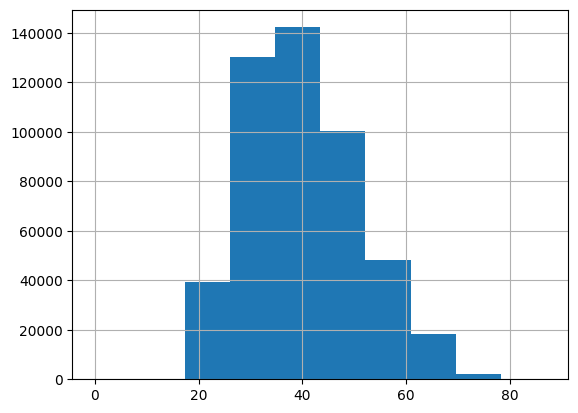

In [4]:
df['Applicant Age'].hist()

<Axes: >

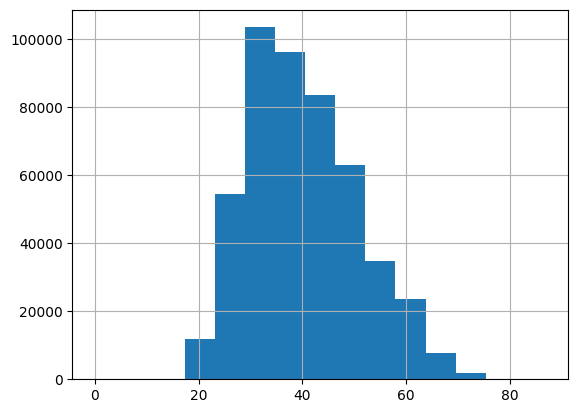

In [6]:
df['Applicant Age'].hist(bins=15)

In [6]:
df = df[df['Applicant Age'] != 0]

In [7]:
df['Applicant Age'].value_counts()

Applicant Age
32    18418
33    17927
31    17165
34    17125
38    16876
      ...  
82       12
18        7
79        6
87        5
78        1
Name: count, Length: 66, dtype: int64

In [8]:
AgeMapper =   [
    {"Cluster" : 1, "ClusterInfo":{"MinAge":17,"MaxAge":22     }},
    {"Cluster" : 2, "ClusterInfo":{"MinAge":22,"MaxAge":28     }},
    {"Cluster" : 3, "ClusterInfo":{"MinAge":28,"MaxAge":33     }},
    {"Cluster" : 4, "ClusterInfo":{"MinAge":33,"MaxAge":39     }},
    {"Cluster" : 5, "ClusterInfo":{"MinAge":39,"MaxAge":44     }},
    {"Cluster" : 6, "ClusterInfo":{"MinAge":44,"MaxAge":50     }},
    {"Cluster" : 7, "ClusterInfo":{"MinAge":50,"MaxAge":55     }},    
    {"Cluster" : 8, "ClusterInfo":{"MinAge":55,"MaxAge":60     }},
    {"Cluster" : 9, "ClusterInfo":{"MinAge":61,"MaxAge":66     }},
    {"Cluster" : 10,"ClusterInfo":{"MinAge":66,"MaxAge":72     }},
    {"Cluster" : 11,"ClusterInfo":{"MinAge":72,"MaxAge":80     }}
]

In [9]:
dftemp = pd.DataFrame()

In [10]:
for cluster in AgeMapper:
    cluster_id = cluster['Cluster'] 
    cluster_info_minAge,cluster_info_maxAge= cluster['ClusterInfo']['MinAge'], cluster['ClusterInfo']['MaxAge']
    dfM =  df[((df['Applicant Age']>=cluster_info_minAge) & (df['Applicant Age']<cluster_info_maxAge))].copy()
    dfM['Cluster_Group'] = cluster_id
    dftemp = pd.concat([dftemp, dfM], ignore_index=True)
    dfM.drop(dfM.index, inplace=True)

In [11]:
dftemp.shape

(477055, 21)

In [12]:
AGMin,AGMax = 66,72

In [13]:
df[((df['Applicant Age']>=AGMin) & (df['Applicant Age']<AGMax))].shape

(4661, 20)

In [14]:
dftemp[((dftemp['Applicant Age']>=AGMin) & (dftemp['Applicant Age']<AGMax))].shape

(4661, 21)

In [15]:
df.shape

(481067, 20)

In [16]:
481067-477055

4012

In [17]:
dftemp.to_csv("df_demographic_data_approrach-2_V-3.csv",index=False)